## Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Visualizing the world's population 

Histogramming the population of the world by creating appropriate buckets for the population.

India and China's populations are vastly more enormous than other countries, so they will be treated as outliers.

In [12]:
world_data = pd.read_csv('/users/elizabeth/downloads/world-data.csv')
world_data = world_data.sort_values('population', ascending = False)

#df for countries with population over 1 bil, essentially just China and India
top_popcount = world_data[world_data['population'] > 1000000000] 
#df for countries with population between 1 bil and 50 mil, from USA to South Africa
middle_popcount = world_data[np.logical_and(world_data['population'] > 50000000, 
                          world_data['population'] < 1000000000)] 
#df for countries with population less than 50 mil
low_popcount = world_data[world_data['population'] < 50000000] 


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Greater than 1 billion (China and India)')

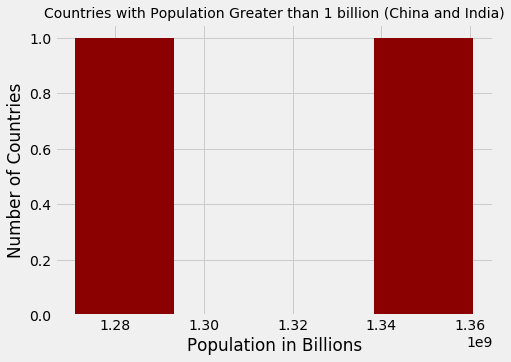

In [15]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(top_popcount['population'], bins=4, color = 'darkred')
plt.xlabel('Population in Billions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Greater than 1 billion (China and India)', size = 'medium')


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Between 50 Million and 1 Billion')

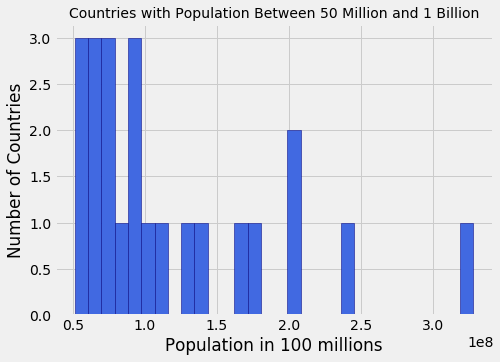

In [16]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(middle_popcount['population'], bins=30, color = 'royalblue', ec='navy')
plt.xlabel('Population in 100 millions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Between 50 Million and 1 Billion', size = 'medium')


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Countries with Population Less Than 50 Million')

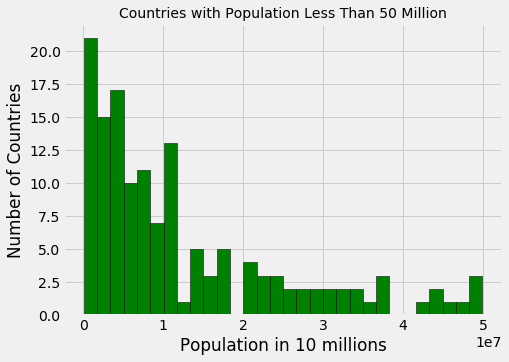

In [17]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(low_popcount['population'], bins=30, color = 'green', ec='black')
plt.xlabel('Population in 10 millions')
plt.ylabel('Number of Countries')
plt.grid('on')
#world_data.hist('population')
#plt.xlabel('Population')          
plt.title('Countries with Population Less Than 50 Million', size = 'medium')


## Visualizing education levels at schools in Philadelphia

In [18]:
schools = pd.read_csv('/Users/elizabeth/downloads/Schools.csv')
schools = schools.rename(columns = {'GRADE_LEVEL' : 'GRADES', 'FACIL_ADDRESS': 'ADDRESS', 'FACIL_NAME' : 'NAMES',
                                    'FACIL_TELEPHONE' : 'TELEPHONE', 'GRADE_ORG' : 'GRADE_NUMBERS',
                                   'X' : 'LONGITUDE', 'Y' : 'LATITUDE'})

In [19]:
schools.head()

,LONGITUDE,LATITUDE,OBJECTID,AUN,SCHOOL_NUM,LOCATION_ID,NAMES,FACILNAME_LABEL,ADDRESS,ZIPCODE,TELEPHONE,ACTIVE,GRADES,GRADE_NUMBERS,ENROLLMENT,TYPE,TYPE_SPECIFIC
0,-74.98762752,40.059143,1.0,226514402.0,NaN,NaN,Nazareth Academy High School,Nazareth Acad HS,4001 GRANT AVE,19114,(215) 637-7676,Open,High School,12-Sep,432.0,Private,Private
1,-75.22716009,39.953432,2.0,126515001.0,3807.0,1330.0,Global Leadership Academy Southwest,Global Leadership Academy at Huey,5200 Pine St,19143 - 4111,NaN,Open,Elem/Middle,K-8,562.0,Charter,Charter
2,-75.12907671,39.978757,3.0,226510512.0,NaN,NaN,Bethel Baptist Academy,Bethel Baptist Acad,2210 E SUSQUEHANNA AVE,19125,(215) 426-1909,Open,Elem/Mid/High,pre K-12,53.0,Private,Private
3,-75.24252029,39.920064,4.0,226511922.0,NaN,NaN,Greater Hope Christian Academy,Greater Hope Christian Acad,7029 WOODLAND AVE,19142,215-729-0374,Open,Elem/Mid/High,K-12,114.0,Private,Private
4,-75.21135429,39.955477,5.0,226512762.0,NaN,NaN,Islamic Education School,Islamic Education Sch,4431-39 WALNUT ST,19104,(215) 387-8888,Open,Elem/Middle,pre K-8,50.0,Private,Private


In [20]:
#cleaning data by 1) dropping NaN values under 'GRADES', 1) Uppercasing all values under 'GRADES'
schools = schools.dropna(subset = ['GRADES'], how = "any") #drops rows where the grade of the school is NaN
vect_upper = np.vectorize(str.upper)
schools['GRADES'] = schools['GRADES'].apply(vect_upper) #makes all the grades uppercase for sorting ease

In [21]:
#Setting up 4 dataframes with for Elem, Mid, High, and Other schools.
elementary_schools = schools[schools['GRADES'].str.contains('ELEM')] #df for elem schools
middle_schools = schools[schools['GRADES'].str.contains('MID')] #df for middle schools
high_schools = schools[schools['GRADES'].str.contains('HIGH')] #df for high schools
other_schools = schools[np.logical_and(np.logical_and(schools["GRADES"].str.contains('ELEM') == False,
                                            schools["GRADES"].str.contains('MID') == False), 
                                            schools["GRADES"].str.contains('HIGH') == False)] #df for other schools

In [22]:
#Making a new df with the different levels of schools and the number of schools per each level.
schools_by_grade = pd.DataFrame({ "level" : ["Elementary", "Middle", "High", "Other"], 
              "number of schools" : [len(elementary_schools), len(middle_schools), len(high_schools), len(other_schools)]})
schools_by_grade


,level,number of schools
0,Elementary,346
1,Middle,313
2,High,169
3,Other,38


Text(0.5,1,'Number of Schools by Level')

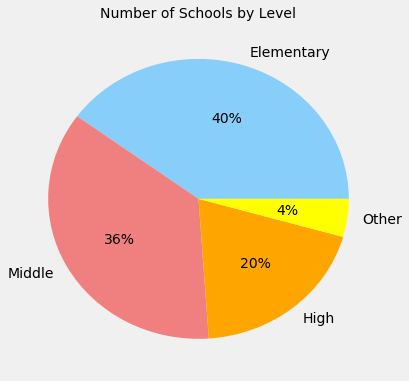

In [23]:
fig = plt.figure(figsize = (6,6))
sizes = schools_by_grade['number of schools']
labels = schools_by_grade['level']
colors = ["lightskyblue", "lightcoral", "orange", "yellow"]
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.0f%%')
plt.title('Number of Schools by Level', size = 'medium')

## Visualizing average enrollment by zipcode 

In [26]:
schools = pd.read_csv('/Users/elizabeth/downloads/Schools.csv')
schools = schools.dropna(subset = ['ZIPCODE'], how = "any")
schools.head()

,X,Y,OBJECTID,AUN,SCHOOL_NUM,LOCATION_ID,FACIL_NAME,FACILNAME_LABEL,FACIL_ADDRESS,ZIPCODE,FACIL_TELEPHONE,ACTIVE,GRADE_LEVEL,GRADE_ORG,ENROLLMENT,TYPE,TYPE_SPECIFIC
0,-74.98762752,40.059143,1.0,226514402.0,NaN,NaN,Nazareth Academy High School,Nazareth Acad HS,4001 GRANT AVE,19114,(215) 637-7676,Open,High School,12-Sep,432.0,Private,Private
1,-75.22716009,39.953432,2.0,126515001.0,3807.0,1330.0,Global Leadership Academy Southwest,Global Leadership Academy at Huey,5200 Pine St,19143 - 4111,NaN,Open,Elem/Middle,K-8,562.0,Charter,Charter
2,-75.12907671,39.978757,3.0,226510512.0,NaN,NaN,Bethel Baptist Academy,Bethel Baptist Acad,2210 E SUSQUEHANNA AVE,19125,(215) 426-1909,Open,Elem/Mid/High,pre K-12,53.0,Private,Private
3,-75.24252029,39.920064,4.0,226511922.0,NaN,NaN,Greater Hope Christian Academy,Greater Hope Christian Acad,7029 WOODLAND AVE,19142,215-729-0374,Open,Elem/Mid/High,K-12,114.0,Private,Private
4,-75.21135429,39.955477,5.0,226512762.0,NaN,NaN,Islamic Education School,Islamic Education Sch,4431-39 WALNUT ST,19104,(215) 387-8888,Open,Elem/Middle,pre K-8,50.0,Private,Private


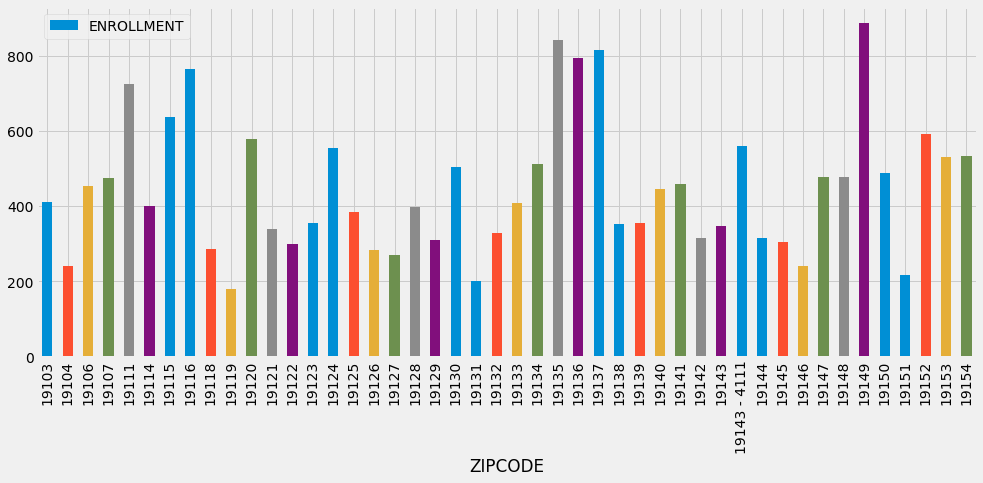

In [27]:
grouped_zips = schools.groupby("ZIPCODE", as_index=False)
avg_enrollment = grouped_zips.agg({"ENROLLMENT" : "mean"})
avg_enrollment = avg_enrollment.dropna(subset= ['ENROLLMENT'], how = "any")
avg_enrollment.plot.bar(x = 'ZIPCODE', y = 'ENROLLMENT', figsize = (15,6))


## Visualizing the age distribution of Oscar winners

... by using the academy awards dataset from kaggle: https://www.kaggle.com/theacademy/academy-awards

I want to show the distribution of ages of the best actor and actress winners.

In [31]:
actors = pd.read_csv('/users/elizabeth/downloads/acting.csv')
actors.head()

,Year,Male Age,Actor,Male Movie,Female Age,Actress,Female Movie,Unnamed: 7
0,1928,44,Emil Jannings,The Last Command,22,Laura Gainor (aka Janet Gaynor),Sunrise,NaN
1,1929,38,Warner Baxter,In Old Arizona,37,Mary Pickford,Coquette,NaN
2,1930,62,George Arliss,Disraeli,30,Norma Shearer,The Divorcee,NaN
3,1931,53,Lionel Barrymore,A Free Soul,62,Marie Dressler,Min and Bill,NaN
4,1932,41,W. Beery(47)/F. March(35)*,The Champ/Dr. Jekyll and Mr. Hyde,32,Helen Hayes,Sin of Madelon,NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


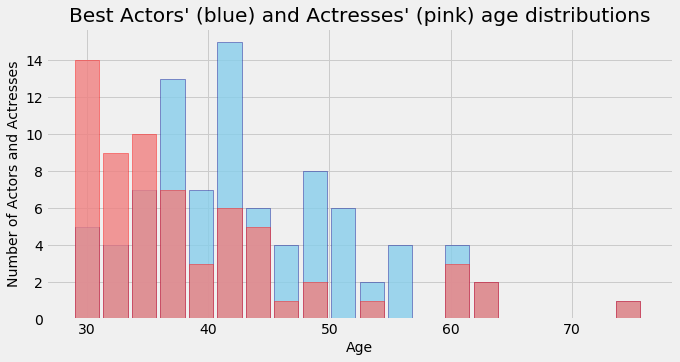

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
plt.xlabel('Age', size = "medium")
plt.ylabel('Number of Actors and Actresses', size = "medium")
plt.title("Best Actors' (blue) and Actresses' (pink) age distributions")
plt.grid('on')
n, bins_actors, patches = plt.hist(actors['Male Age'], bins = 20, normed = 0, ec = 'darkblue',
                            width = 2.0, color = 'skyblue', alpha = 0.8)
n, bins, patches = plt.hist(actors['Female Age'], bins = bins_actors, normed = 0, ec = 'red',
                            width = 2.0, color = 'lightcoral', alpha = 0.8)


- from the graph, it seems that the most Best Actors are in their early 40s, and the most Best Actresses are in their mid 30s


## Comparing San Diego's Summer Temperatures to Philadelphia's

Temperature distribution - People often describe the west coast as being perfect almost all year round.
I want to see if that really is the case by using the following data.

I will compare Philadelphia and San Diego during June, July, and August.

Sources: 
- https://www.wunderground.com/history/monthly/us/ca/san-diego/KSAN/date/2018-8

- https://www.wunderground.com/history/monthly/us/ca/san-diego/Kphl/date/2018-8


In [41]:
san_diego = pd.read_csv('/Users/elizabeth/downloads/san diego june through august.csv') #df with June, July, and August data for San Diego
philadelphia = pd.read_csv('/Users/elizabeth/downloads/philadelphia june through august.csv') #df with June, July, and August data for Philly

In [43]:
san_diego = san_diego[['Date', 'Avg Temp', 'Avg Precipitation']] # the metric that I'm choosing is temperature. 
philadelphia = philadelphia[['Date', 'Avg Temp', 'Avg Precipitation']]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


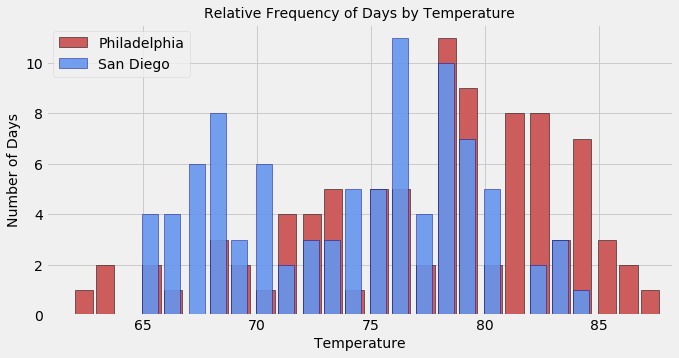

In [46]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
plt.xlabel('Temperature', size = "medium")
plt.ylabel('Number of Days', size = "medium")
plt.grid('on')
plt.title('Relative Frequency of Days by Temperature', size = 'medium')
n, bins_philly, patches = plt.hist(philadelphia['Avg Temp'], bins = 160, normed = 0, ec = 'black',
                            width = .8, color = 'indianred', label = 'Philadelphia')
n, bins, patches = plt.hist(san_diego['Avg Temp'], bins = bins_philly, normed = 0, ec = 'darkblue',
                            width = .7, color = 'cornflowerblue', label = 'San Diego', alpha = 0.9)
plt.legend(loc='upper left')

- My metric of choice is temperature. As a Californian, I may be biased, but temperature is the main factor in deciding if I like the weather or not. I am not a fan of temperatures that are greater than 80 degrees. This visualization demonstrates that Philadelphia (red) has many more days in the range of 80+ degrees than San Diego (blue). To me, this suggests that San Diego, being more temperate, is a nicer city to live in. 

- Additionally, clear days are more convenient than rainy days. So, plotting the number of clear days and rainy days for Philadelphia vs. San Diego...

In [47]:
# this is a function that will tell me if precipitation > 0 
def is_rainy(x):
    if x > 0:
        return('Num of Rainy Days')
    else:
        return('Num of Clear Days')

In [48]:
philadelphia['Rain?'] = philadelphia['Avg Precipitation'].apply(is_rainy)
san_diego['Rain?'] = san_diego['Avg Precipitation'].apply(is_rainy)

In [49]:
# making a joint dataframe with both Philly and SD's weather in terms of number of clear/rainy days.
rain_in_philadelphia = philadelphia.groupby('Rain?', as_index=False)
rain_in_philadelphia = rain_in_philadelphia.agg({'Date' : 'count'})
rain_in_philadelphia = rain_in_philadelphia.rename(columns = {'Date' : 'Number of Days'})
rain_in_san_diego = san_diego.groupby('Rain?', as_index=False)
rain_in_san_diego = rain_in_san_diego.agg({'Date' : 'count'})
rain_in_san_diego = rain_in_san_diego.rename(columns = {'Date' : 'Number of Days'})

san_diego_philadelphia = pd.merge(rain_in_philadelphia, rain_in_san_diego, on = 'Rain?')
san_diego_philadelphia = san_diego_philadelphia.rename(columns = {'Number of Days_x' : 'Philadelphia',
                                                                  'Number of Days_y' : 'San Diego'})


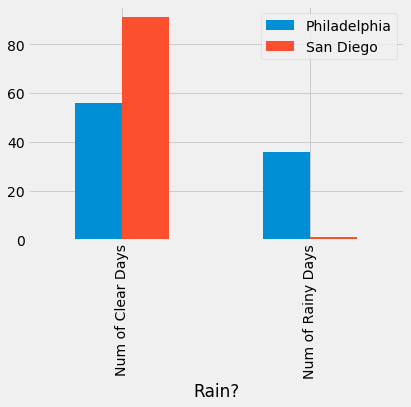

In [50]:
san_diego_philadelphia.plot.bar(x = "Rain?", y = ["Philadelphia", "San Diego"])

- We can see that Philadelphia has a significantly larger amount of rainy days, and San Diego has a significantly larger amount of clear days. In summation, San Diego's mild temperatures and lack of rain make it a more comfortable city to live in. 